#**Relatório 4 – Diferenciação e Integração Numérica**

Nome: Ricardo Coutinho Cordeiro

Professora: Larissa A. de Freitas

Nota: 8.8

**Erros deste relatório:**

1) b) 65,98 m/s

4) velocidade e aceleração média incorretas

Velocidades da Partícula A: [1.5 2. 2.5 3. 3.5 4. 4.5] Acelerações da Partícula A: [0.05 0.05 0.05 0.05 0.05 0.05]

Velocidades da Partícula B: [2. 1.5 1. 1.5 1.5 1.5 3. ] Acelerações da Partícula B: [-0.05 -0.05 0.05 0. 0. 0.15]

Velocidades da Partícula C: [ 8. 4. -4. -0.5 1.5 3. 1. ] Acelerações da Partícula C: [-0.4 -0.8 0.35 0.2 0.15 -0.2 ]

#**Bibliotecas Utilizadas**

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

#**Métodos Utilizados**

##**Trapezio**

In [ ]:
def trapezoid(initial_value, final_value, step_size):
    trapezoid = (step_size * (initial_value + final_value) / 2)
    return trapezoid


##**Trapezio Modificado**

In [ ]:
def trapezoidModify(step_size, num_intervals, function_values):
    result = function_values[0]

    for i in range(1, num_intervals):
        result += 2 * function_values[i]

    result += function_values[num_intervals]
    return (step_size * result) / 2


##**1/3 Simpson**

In [ ]:
def simpsonOneThird(base, initial_height, mid_height, final_height):
    simpson_area = (base / 3) * (initial_height + 4 * mid_height + final_height)
    return simpson_area


##**3/8 Simpson**

In [ ]:
def simpsonThreeEighths(base, height_start, height_mid1, height_mid2, height_end):

    simpson_area = (3 * base / 8) * (height_start + 3 * (height_mid1 + height_mid2) + height_end)
    return simpson_area

##**Euler**

In [ ]:
def euler(ode_function, initial_x, final_x, initial_y, num_steps, step_size):

    x = initial_x
    y = initial_y
    x_values = [0] * num_steps
    y_values = [0] * num_steps
    function_values = [0] * num_steps
    x_values[0] = x
    y_values[0] = y

    for i in range(num_steps):
        function_values[i] = ode_function(x, y)
        x = initial_x + i * step_size
        y += step_size * function_values[i]
        function_values[i] = ode_function(x, y)
        x_values[i] = x
        y_values[i] = y

    return x_values, y_values, function_values


##**Runge-Kutta de 2ª ordem**

In [ ]:
def rungeKuttaSecondOrder(initial_y, step_size, num_steps):
    y = initial_y

    for t in range(0, num_steps * step_size, step_size):
        k1 = step_size * rate_of_spreading(t, y)
        k2 = step_size * rate_of_spreading(t + step_size, y + k1)
        y = y + 0.5 * (k1 + k2)

    return y


##**Runge-Kutta de 4ª ordem**

In [ ]:
def rungeKutta(f, initial_x, initial_y, step_size, num_steps):

    x_values = [initial_x]
    y_values = [initial_y]
    k1_values = [0] * num_steps
    k2_values = [0] * num_steps
    k3_values = [0] * num_steps
    k4_values = [0] * num_steps

    for i in range(num_steps):
        k1_values[i] = step_size * f(x_values[-1], y_values[-1])
        k2_values[i] = step_size * f(x_values[-1] + step_size/2, y_values[-1] + k1_values[i]/2)
        k3_values[i] = step_size * f(x_values[-1] + step_size/2, y_values[-1] + k2_values[i]/2)
        k4_values[i] = step_size * f(x_values[-1] + step_size, y_values[-1] + k3_values[i])

        y_next = y_values[-1] + (k1_values[i] + 2*k2_values[i] + 2*k3_values[i] + k4_values[i])/6
        x_next = x_values[-1] + step_size

        x_values.append(x_next)
        y_values.append(y_next)

    return x_values, y_values, k1_values, k2_values, k3_values, k4_values

#**Exercícios**

##1.

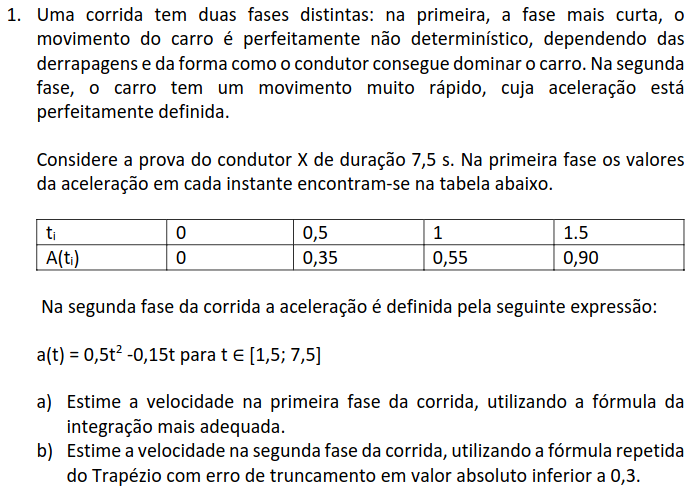

In [ ]:
# a.)

def calculate_velocity(accelerations, time_intervals):
    velocity = 0.0

    for i in range(1, len(accelerations)):
        initial_acceleration = accelerations[i - 1]
        final_acceleration = accelerations[i]
        time_interval = time_intervals[i] - time_intervals[i - 1]

        velocity += trapezoid(initial_acceleration, final_acceleration, time_interval)

    return velocity

# Valores da aceleração e intervalos de tempo correspondentes
accelerations = [0.0, 0.35, 0.55, 0.90]
time_intervals = [0.0, 0.5, 1.0, 1.5]

# Calcular a velocidade
velocity = calculate_velocity(accelerations, time_intervals)
print(f"Velocidade estimada na primeira fase da corrida: {velocity} m/s")

# b.)

def acceleration_function(t):
    return 0.5 * t**2 - 0.15 * t

def estimate_velocity(target_error=0.3):
    # Parâmetros da segunda fase
    start_time = 1.5
    end_time = 7.5

    # Inicialização
    step_size = 0.1  # Escolha um valor adequado para o passo inicial
    num_intervals = int((end_time - start_time) / step_size)
    velocity = 0.0
    error = float('inf')

    while error > target_error:
        # Calcula os valores da aceleração para cada intervalo
        times = [start_time + i * step_size for i in range(num_intervals + 1)]
        accelerations = [acceleration_function(t) for t in times]

        # Usa a fórmula do Trapézio repetida para calcular a velocidade
        velocity_new = trapezoidModify(step_size, num_intervals, accelerations)

        # Calcula o erro de truncamento
        error = abs(velocity_new - velocity)

        # Atualiza a velocidade e o número de intervalos
        velocity = velocity_new
        step_size /= 2
        num_intervals *= 2

    return velocity

# Chama a função para estimar a velocidade na segunda fase da corrida
estimated_velocity = estimate_velocity()
print(f"Velocidade estimada na segunda fase: {estimated_velocity} m/s")


Velocidade estimada na primeira fase da corrida: 0.675 m/s
Velocidade estimada na segunda fase: 65.70125 m/s


##2.

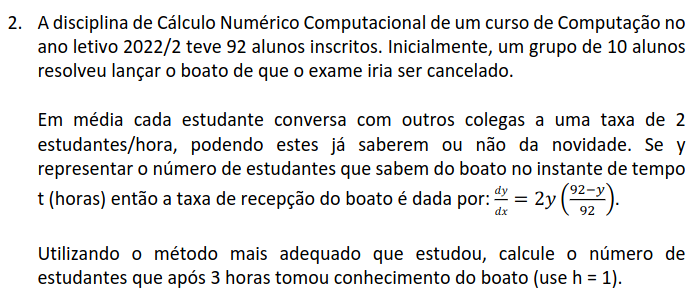

In [ ]:
# Define a função que representa a taxa de recepção do boato dy/dx
def rate_of_spreading(t, y):
    return 2 * y * (92 - y) / 92

# Parâmetros
initial_y = 10  # Número inicial de estudantes que sabem do boato
step_size = 1   # Passo de tempo (1 hora)
num_steps = 3   # Número de horas para calcular

# Calcula o número de estudantes após 3 horas
final_count = rungeKuttaSecondOrder(initial_y, step_size, num_steps)

print(f"Número de estudantes que sabem do boato após {num_steps} horas: {final_count:.0f}")

Número de estudantes que sabem do boato após 3 horas: 73


##3.

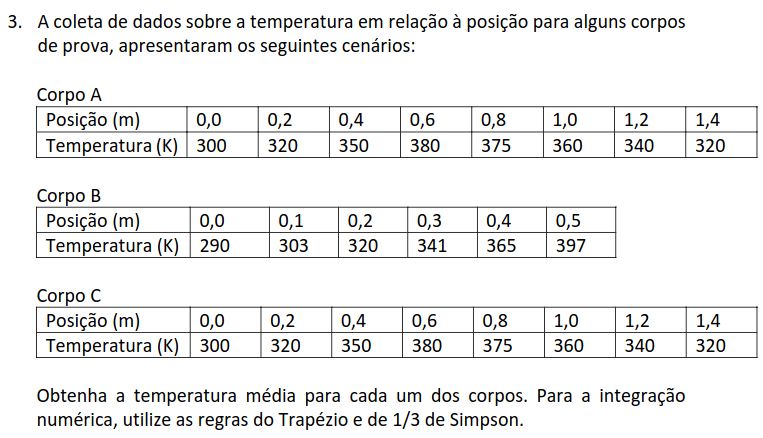

In [ ]:
# Dados de temperatura para cada corpo
temperatures_corpo_a = [300, 320, 350, 380, 375, 360, 340, 320]
temperatures_corpo_b = [290, 303, 320, 341, 365, 397]
temperatures_corpo_c = [300, 320, 350, 380, 375, 360, 340, 320]

# Posições para cada corpo
positions_corpo_a = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
positions_corpo_b = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
positions_corpo_c = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]

# Função para calcular a média usando a regra do Trapézio
def calculate_average_trapezoid(positions, temperatures):
    num_points = len(positions)
    step_size = positions[1] - positions[0]
    integral = trapezoidModify(step_size, num_points - 1, temperatures)
    average = integral / (positions[-1] - positions[0])
    return average

# Função para calcular a média usando a regra 1/3 de Simpson
def calculate_average_simpson(positions, temperatures):
    num_points = len(positions)
    step_size = positions[1] - positions[0]

    # Usar apenas os primeiros 7 pontos para manter um número ímpar de pontos
    if num_points > 7:
        num_points = 7
        temperatures = temperatures[:7]

    integral = simpsonOneThird(step_size, temperatures[0], sum(temperatures[1:-1:2]), sum(temperatures[2::2]))
    average = integral / (positions[num_points - 1] - positions[0])
    return average

# Calcula a temperatura média para cada corpo usando ambas as regras
average_corpo_a_trapezoid = calculate_average_trapezoid(positions_corpo_a, temperatures_corpo_a)
average_corpo_b_trapezoid = calculate_average_trapezoid(positions_corpo_b, temperatures_corpo_b)
average_corpo_c_trapezoid = calculate_average_trapezoid(positions_corpo_c, temperatures_corpo_c)

average_corpo_a_simpson = calculate_average_simpson(positions_corpo_a, temperatures_corpo_a)
average_corpo_b_simpson = calculate_average_simpson(positions_corpo_b, temperatures_corpo_b)
average_corpo_c_simpson = calculate_average_simpson(positions_corpo_c, temperatures_corpo_c)

# Imprime os resultados
print("Média de temperatura usando a regra do Trapézio:")
print(f"Corpo A: {average_corpo_a_trapezoid} K")
print(f"Corpo B: {average_corpo_b_trapezoid} K")
print(f"Corpo C: {average_corpo_c_trapezoid} K")
print("\nMédia de temperatura usando a regra 1/3 de Simpson:")
print(f"Corpo A: {average_corpo_a_simpson} K")
print(f"Corpo B: {average_corpo_b_simpson} K")
print(f"Corpo C: {average_corpo_c_simpson} K")


Média de temperatura usando a regra do Trapézio:
Corpo A: 347.8571428571429 K
Corpo B: 334.5 K
Corpo C: 347.8571428571429 K

Média de temperatura usando a regra 1/3 de Simpson:
Corpo A: 311.3888888888889 K
Corpo B: 236.73333333333332 K
Corpo C: 311.3888888888889 K


##4.

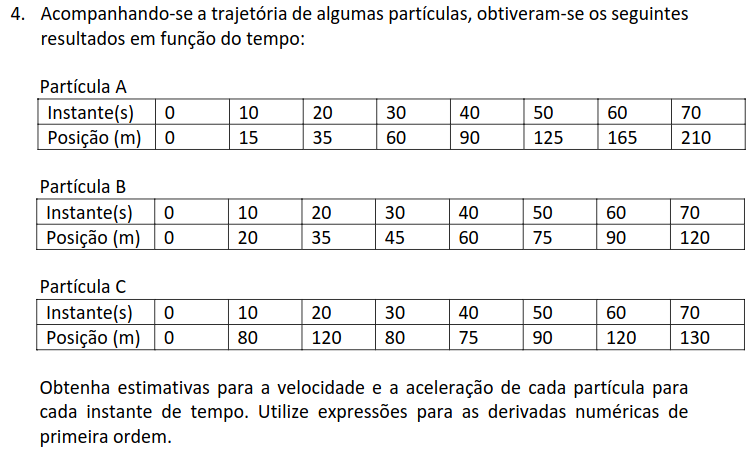

In [ ]:
def velocity(positions, times):
    v = [0] * len(times)
    for i in range(len(times)):
        if i == 0:
            v[i] = (positions[i+1] - positions[i]) / (times[i+1] - times[i])
        elif i == len(times)-1:
            v[i] = (positions[i] - positions[i-1]) / (times[i] - times[i-1])
        else:
            v[i] = (positions[i+1] - positions[i-1]) / (times[i+1] - times[i-1])
    return v

def acceleration(velocities, times):
    a = [0] * len(times)
    for i in range(len(times)):
        if i == 0:
            a[i] = (velocities[i+1] - velocities[i]) / (times[i+1] - times[i])
        elif i == len(times)-1:
            a[i] = (velocities[i] - velocities[i-1]) / (times[i] - times[i-1])
        else:
            a[i] = (velocities[i+1] - velocities[i-1]) / (times[i+1] - times[i-1])
    return a

# Dados das partículas A, B e C
positions_a = [0, 15, 35, 60, 90, 125, 165, 210]
positions_b = [0, 20, 35, 45, 60, 75, 90, 120]
positions_c = [0, 80, 120, 80, 75, 90, 120, 130]
times = [0, 10, 20, 30, 40, 50, 60, 70]

# Calcula velocidade e aceleração para as partículas A, B e C
velocities_a = velocity(positions_a, times)
accelerations_a = acceleration(velocities_a, times)

velocities_b = velocity(positions_b, times)
accelerations_b = acceleration(velocities_b, times)

velocities_c = velocity(positions_c, times)
accelerations_c = acceleration(velocities_c, times)

# Imprime os resultados
print("Partícula A:")
print("Tempo (s) | Velocidade (m/s) | Aceleração (m/s²)")
for i in range(len(times)):
    print(f"{times[i]:<9} | {velocities_a[i]:<17.2f} | {accelerations_a[i]:<14.2f}")

print("\nPartícula B:")
print("Tempo (s) | Velocidade (m/s) | Aceleração (m/s²)")
for i in range(len(times)):
    print(f"{times[i]:<9} | {velocities_b[i]:<17.2f} | {accelerations_b[i]:<14.2f}")

print("\nPartícula C:")
print("Tempo (s) | Velocidade (m/s) | Aceleração (m/s²)")
for i in range(len(times)):
    print(f"{times[i]:<9} | {velocities_c[i]:<17.2f} | {accelerations_c[i]:<14.2f}")


Partícula A:
Tempo (s) | Velocidade (m/s) | Aceleração (m/s²)
0         | 1.50              | 0.03          
10        | 1.75              | 0.04          
20        | 2.25              | 0.05          
30        | 2.75              | 0.05          
40        | 3.25              | 0.05          
50        | 3.75              | 0.05          
60        | 4.25              | 0.04          
70        | 4.50              | 0.03          

Partícula B:
Tempo (s) | Velocidade (m/s) | Aceleração (m/s²)
0         | 2.00              | -0.03         
10        | 1.75              | -0.04         
20        | 1.25              | -0.03         
30        | 1.25              | 0.01          
40        | 1.50              | 0.01          
50        | 1.50              | 0.04          
60        | 2.25              | 0.07          
70        | 3.00              | 0.07          

Partícula C:
Tempo (s) | Velocidade (m/s) | Aceleração (m/s²)
0         | 8.00              | -0.20         
10        | 6